In [3]:
# Install Required Packages

# pip install bs4
# pip install nltk


# Import packages

In [3]:
# We'll use requests to read in your data from the webpage, BeautifulSoup to help process our raw data, 
# nltk as the definitive natural language processing package, and RegexpTokenizer to break down our data
# into words. We'll use matplotlib and seaborn to visualize the frequency counts of words at the end.

import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in Text

In [4]:
# Then, we will read in the text we'll analyze.

url = 'https://www.gutenberg.org/files/11/11-h/11-h.htm'

In [5]:
# Once we have our URL saved to a Python variable, we can get make a request to get data from that webpage. 
# This will use the function requests.get(), and we are making it to the url webpage we just saved:

r = requests.get(url)

In [6]:
# Then, we can find out the type of that request by using the function type():

type(r)

requests.models.Response

# Convert Text to soup

In [7]:
# The next few lines take the data off the webpage and extract the text, then use the html5lib to convert it 
# into something we'll be able to process and better understand, called soup.

html = r.text
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

# Use HTML Tags to Extract Useful Info

In [8]:
# We can then call out certain pieces of this text. For instance, the title:

soup.title.string

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll'

# Tokenize Data

In [11]:
# The following code uses the function get_text() to retrieve our text, and then we will use the function
# RegexpTokenizer() to break it down into words, separated by spaces. In the language RegEx, \w+ is the 
# symbol for space.

# Then the function tokenize() will actually perform the operation, and we will get the first ten words with [:10]:

text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland']

# Remove Capitalization


In [12]:
# We can remove capitalization like this:

words = []
for word in tokens:
    words.append(word.lower())

In [13]:
# The above code uses a for loop, and makes use of the function lower() to strip caps.
# It all goes into a dictionary named words. We can take a look at the first ten entries in the dictionary 
# like this:

words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland']

# Removing Stopwords

In [14]:
# There are some words that mean nothing out of context. These "boring" and "useless" words are considered 
# stopwords, and, luckily, nltk already has a list of them! We can pull them out and label them like this:

stopwords = nltk.corpus.stopwords.words('english')

In [15]:
# here are the first ten stopwords in the list:

stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
# These words don't have any emotional context, descriptive information, or tell you anything about the subject.
# So we'll want to filter these out, and others like them, so they don't clutter up our analysis.

In [16]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)
        

# This makes a dictionary named wordsWithoutStops that filters out all the stopwords,
# so only the good stuff is left. 

In [17]:
wordsWithoutStops[:10]

['project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'project',
 'gutenberg']

# Count and Plot Words

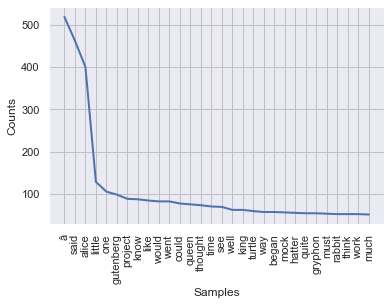

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
# We have successfully brought in data from a website with a get request, made it usable with BeautifulSoup, 
# tokenized it, and cleaned it. Now we can plot it.

sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(30)

In [ ]:
# Conclusion

# The graph above plots the 30 words with maximum frequency. 'a', 'said', 'alice' are used mmaximum number 
# of times on the page.